# Lab Assignment 1 
### Learning and generalisation in feed-forward networks — from perceptron learning to backprop

### 3. Part I
####  3.1 Classification with a single-layer perceptron
##### 3.1.1 Generation of linearly-separable data

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def generateSubsets(n,scenario,shuffle=1, verbose=1, pattern=1):
    mu_A = np.array([1.0, 0.3])
    mu_B = np.array([0.0, -0.1])
    sigma_A = 0.2
    sigma_B = 0.3
    if scenario == 0:
        class_A=np.zeros((2,int(n)))
        class_B=np.zeros((2,int(n)))
        class_A[0]= np.concatenate((np.random.randn(1,int(0.5*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.5*n))*sigma_A+mu_A[0]),axis=1)
        class_B[0]= np.random.randn(1,int(n))*sigma_B +mu_B[0]
        class_A[1]= np.random.randn(1,int(n))*sigma_A +mu_A[1]
        class_B[1]= np.random.randn(1,int(n))*sigma_B +mu_B[1]     
    #50% each
    if scenario==1:
        class_A=np.zeros((2,int(n/2)))
        class_B=np.zeros((2,int(n/2)))
        class_A[0]= np.concatenate((np.random.randn(1,int(0.25*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.25*n))*sigma_A+mu_A[0]),axis=1)
        class_B[0]= np.random.randn(1,int(0.5*n))*sigma_B +mu_B[0]
        class_A[1]= np.random.randn(1,int(0.5*n))*sigma_A +mu_A[1]
        class_B[1]= np.random.randn(1,int(0.5*n))*sigma_B +mu_B[1]

    #50% of A, 100% of B
    if scenario==2:
        class_A=np.zeros((2,int(n/2)))
        class_B=np.zeros((2,int(n)))
        class_A[0]= np.concatenate((np.random.randn(1,int(0.25*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.25*n))*sigma_A+mu_A[0]),axis=1)
        class_B[0]= np.random.randn(1,n)*sigma_B +mu_B[0]
        class_A[1]= np.random.randn(1,int(0.5*n))*sigma_A +mu_A[1]
        class_B[1]= np.random.randn(1,n)*sigma_B +mu_B[1]

    #50% of B, 100% of A
    if scenario==3:
        class_A=np.zeros((2,int(n)))
        class_B=np.zeros((2,int(n/2)))
        class_A[0]= np.concatenate((np.random.randn(1,int(0.5*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.5*n))*sigma_A+mu_A[0]),axis=1)
        class_B[0]= np.random.randn(1,int(0.5*n))*sigma_B +mu_B[0]
        class_A[1]= np.random.randn(1,n)*sigma_A +mu_A[1]
        class_B[1]= np.random.randn(1,int(0.5*n))*sigma_B +mu_B[1]

    #20% 80% and stuff
    if scenario==4:
        class_A=np.zeros((2,int(n)))
        class_B=np.zeros((2,int(n)))
        class_A[0]= np.concatenate((np.random.randn(1,int(0.5*n))*sigma_A-mu_A[0],np.random.randn(1,int(0.5*n))*sigma_A+mu_A[0]),axis=1)
        class_A[1]= np.random.randn(1,n)*sigma_A +mu_A[1]

        c_a = np.zeros((2,20))
        c_b = np.zeros((2,80))
        #print(class_A.shape)
        a_i = 0
        b_i = 0
        for i in range(n):
            if class_A[1,i] < 0 and c_a[1,19] == 0:
                c_a[:,a_i] = class_A[:,i]
                a_i+= 1
            elif class_A[1,i] >0 and c_b[1,79] == 0:
                c_b[:,b_i] = class_A[:,i]
                b_i+=1
        class_A = c_a
        class_B = c_b

    if shuffle:
        patterns=np.concatenate((class_A,class_B),axis=1)
        patterns = np.concatenate((patterns,np.ones((1,patterns.shape[1]))))
        targets=np.concatenate((np.ones(n),-np.ones(n)))
        i = np.arange(patterns.shape[1])
        np.random.shuffle(i)
        patterns=patterns[:,i]
        targets=targets[i]
        #print(patterns)
        #print(targets)
    else:
        patterns = np.concatenate((class_A,class_B),axis=1)
        targets = np.array([np.ones(n,),-np.ones(n,)])
        targets = np.ravel(targets)

    if verbose:
        #Plotting classes if desired
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt.legend(handles=[plt_A, plt_B])
        plt.show()



    if pattern:
        return patterns, targets
    else:
        return class_A, class_B

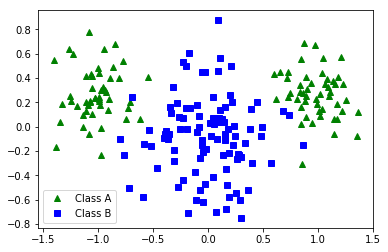

In [20]:
class_A, class_B = generateSubsets(100,0,shuffle=1,pattern=0)

# 3.1.3 Classification of samples that are not linearly separable

In [21]:
#Randomly initalize weight matrix W
def weights_init(n_dim,n_points,scale):
    W = scale*np.random.randn(n_dim,n_points)
    return W


In [22]:
def error(T, Y):
    #return np.sum((T - Y) ** 2) / 2
    return np.mean(((T-Y)**2))

def update_weights_delta_rule(eta,T,W,X):
    H = np.matmul(W,X)
    err = error(T,H)
    dW = -eta*np.matmul(H-T,np.transpose(X))
    return dW, err

def update_weights_perceptron(eta,T,W,X):
    H = np.matmul(W,X)
    Y = np.sign(H)
    err = error(T,Y)
    dW = -eta*np.matmul((Y-T),np.transpose(X))
    #dW = eta*err*X
    return dW, err

def update_weights_delta_rule_sequential(eta,X,T,W):
    weights = 0
    err = []
    for i in range(len(T)):
        #X1_sample = X[0][i]
        #X2_sample = X[1][i]
        #X3_sample = X[2][i]
        X_sample = X[:,i]
        T_sample = T[i]
        
        H = np.matmul(W,X_sample)
        dW = -eta*(H-T_sample)*np.transpose(X_sample)
        #H_s.append(H)
        err.append((H-T_sample)**2)
        
        weights = weights+dW
    print(weights)
    err = np.mean(err)
    print(err)
    
    return weights, err

def train_network(eta,X,W,T,epochs,plot=1,sequential=False):
    
    errors = np.zeros((2,epochs))
    W_perceptron = W
    W_delta_rule = W
    #print(W_perceptron)
    #print(W_perceptron[0][2])
    if plot:
        linespace = np.linspace(-2,2,10)
        line_perceptron = get_decisionBound(W_perceptron)
        line_delta_rule = get_decisionBound(W_delta_rule)
        
        plt.subplot(211)
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt_line_perceptron, = plt.plot(linespace,line_perceptron,'k',label='DecisionBoundary')
        plt.legend(handles=[plt_A, plt_B, plt_line_perceptron])
        plt.axis([-2.5,2.5,-2,2])
        plt.title('Perceptron Learning Rule')
        
        plt.subplot(212)
        plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
        plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
        plt_line_delta_rule, = plt.plot(linespace,line_delta_rule,'k',label='DecisionBoundary')
        plt.legend(handles=[plt_A, plt_B, plt_line_delta_rule])
        plt.axis([-2.5,2.5,-2,2])
        plt.title('Delta Learning Rule')
        
        
        
    
    for i in range(epochs):
        
        if sequential:
            dw_delta_rule, err_delta_rule = update_weights_delta_rule_sequential(eta,X,T,W_delta_rule)
        else:
            dw_delta_rule, err_delta_rule = update_weights_delta_rule(eta,T,W_delta_rule,X)
        
        dW_perceptron, err_perceptron = update_weights_perceptron(eta,T,W_perceptron,X)
        
        W_delta_rule = dw_delta_rule + W_delta_rule
        W_perceptron = dW_perceptron + W_perceptron
        print(W_perceptron)
        
        errors[0,i] = err_perceptron
        errors[1,i] = err_delta_rule
        
        if plot:
            line_perceptron = get_decisionBound(W_perceptron)
            line_delta_rule = get_decisionBound(W_delta_rule)
    
            #plt_line_perceptron.set_ydata(line_perceptron)
            #plt_line_delta_rule.set_ydata(line_delta_rule)
            
            #plt.ion()
            #plt.draw()
            #plt_line_perceptron.remove()
            #plt_line_delta_rule.remove()
            
            plt.subplot(211)
            plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
            plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
            plt_line_perceptron, = plt.plot(linespace,line_perceptron,'k',label='DecisionBoundary')
            plt.legend(handles=[plt_A, plt_B, plt_line_perceptron])
            plt.axis([-2.5,2.5,-2,2])
            plt.title('Perceptron Learning Rule')
        
            plt.subplot(212)
            plt_A, = plt.plot(class_A[0,:],class_A[1,:],'g^', label='Class A')
            plt_B, = plt.plot(class_B[0,:],class_B[1,:],'bs', label='Class B')
            plt_line_delta_rule, = plt.plot(linespace,line_delta_rule,'k',label='DecisionBoundary')
            plt.legend(handles=[plt_A, plt_B, plt_line_delta_rule])
            plt.axis([-2.5,2.5,-2,2])
            plt.title('Delta Learning Rule')
            
            plt.show()
            plt.pause(0.1)
    
            #print(linespace.shape,line.shape)
    
        
    
    #plt.show()
            
    return W_perceptron, W_delta_rule, errors


In [23]:
def get_decisionBound(w):
    #print(w.shape)
    slope_vec = np.array([w[0][1],-w[0][0]])
    slope = slope_vec[1]/slope_vec[0]
    intercept = w[0][2]/np.linalg.norm(w)
    
    linespace = np.linspace(-2,2,10)
    line = slope*linespace + intercept
    y=(-1/(w[0][1]))*(w[0][0]*line+(w[0][2]))
    return y

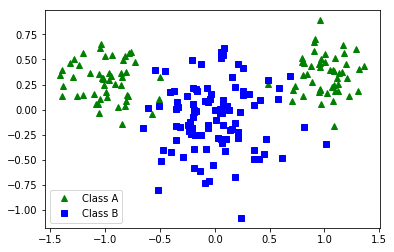

[[0.00078359 0.06118827 0.18396519]]


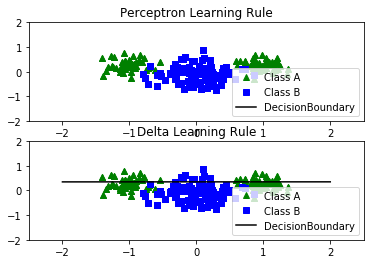

[[ 0.0020051   0.07781231 -0.01603481]]


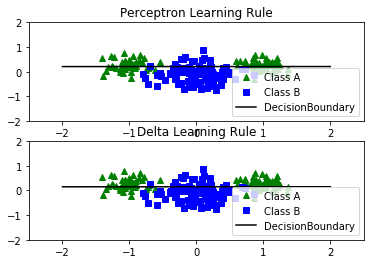

[[-0.02200401  0.06908372  0.00396519]]


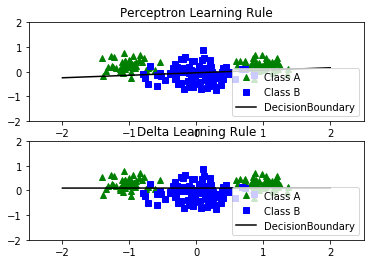

[[ 0.01941637  0.05766359 -0.06603481]]


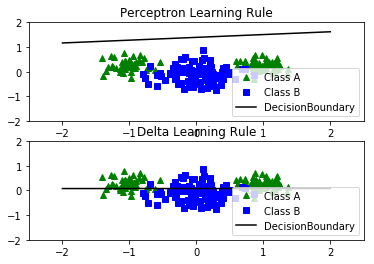

[[0.01873215 0.12031673 0.13196519]]


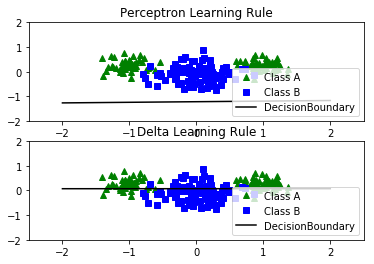

[[ 0.01995365  0.13694077 -0.06803481]]


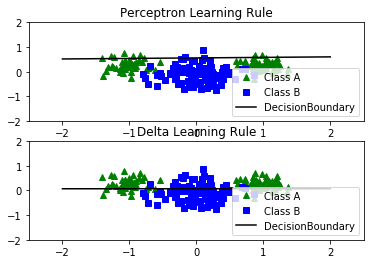

[[-0.0311199   0.16925913  0.06996519]]


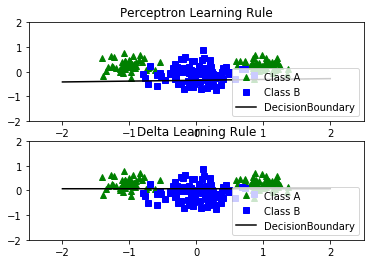

[[-0.02604495  0.16626094 -0.09603481]]


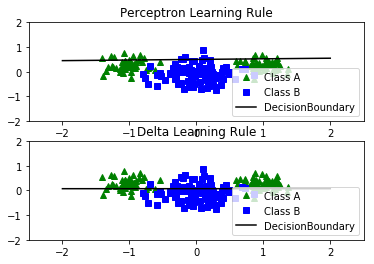

[[0.00189037 0.21293408 0.07196519]]


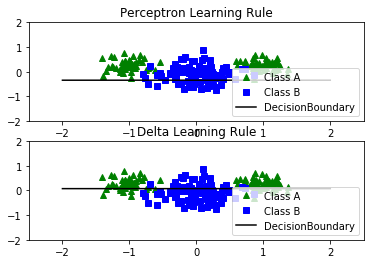

[[ 0.00267033  0.20740646 -0.08803481]]


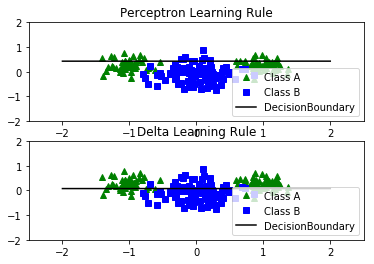

[[-0.01322857  0.22810561  0.02996519]]


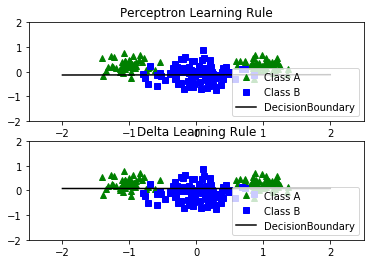

[[-0.009536    0.21031894 -0.07603481]]


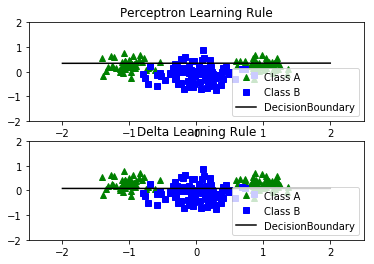

[[1.11765226e-04 2.22368055e-01 1.79651889e-02]]


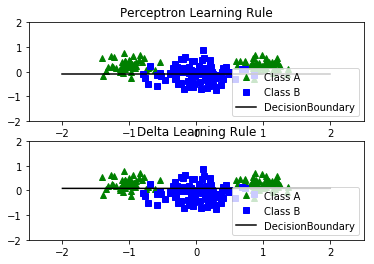

[[ 0.00168799  0.2038449  -0.08203481]]


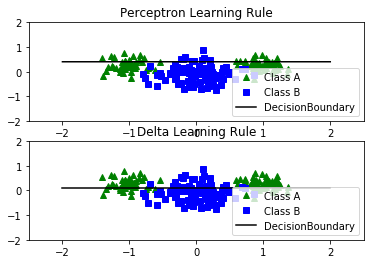

[[-0.01681897  0.22292762  0.03196519]]


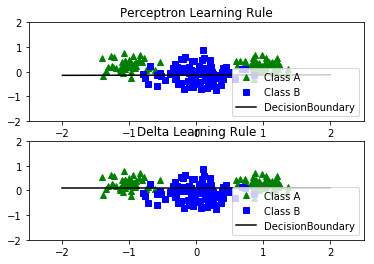

[[-0.01063385  0.20615129 -0.08003481]]


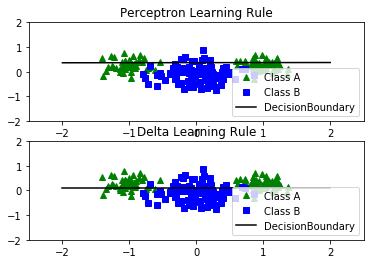

[[-0.00076219  0.22274792  0.02596519]]


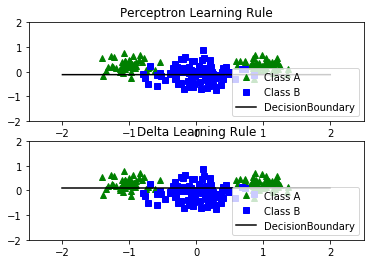

[[ 0.00079287  0.20443418 -0.07603481]]


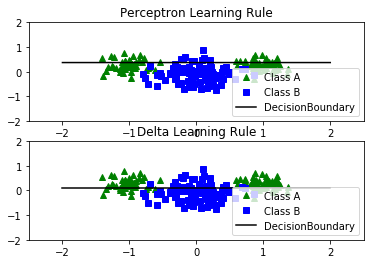

[[-0.01959722  0.2188774   0.02596519]]


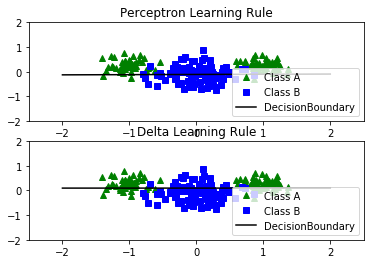

[[-0.01590464  0.20109072 -0.08003481]]


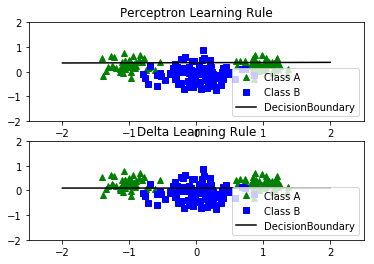

In [24]:
#Perceptron and Delta learning rule
n = 100
eta = 1e-3
epochs = 20
n_outputs = 1
n_dim = 3
scale = 1e-2

X, T = generateSubsets(n,0,pattern=1)
W = weights_init(n_outputs,n_dim,scale)

W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)



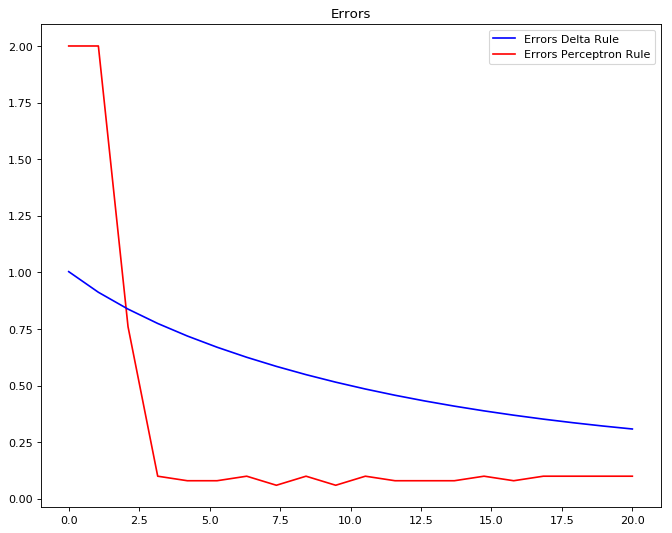

In [162]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt_errs_perceptron, = plt.plot(np.linspace(0,epochs,epochs),errors[0][:],'r', label='Errors Perceptron Rule')
plt_errs_delta_rule, = plt.plot(np.linspace(0,epochs,epochs),errors[1][:],'b',label='Errors Delta Rule')
#fig.add_plot(plt_errs_perceptron)
plt.legend(handles=[plt_errs_delta_rule,plt_errs_perceptron])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()

#print(errors)

# REMOVE 50% of each!


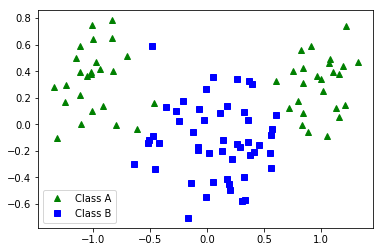

[[0.0404053  0.01154505 0.05614623]]


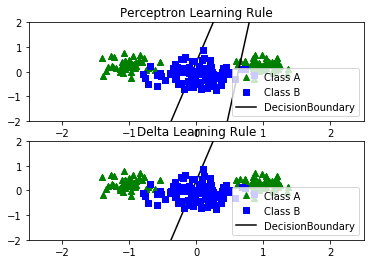

[[0.0404053  0.01154505 0.05614623]]


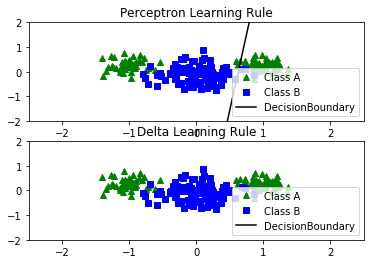

[[0.0404053  0.01154505 0.05614623]]


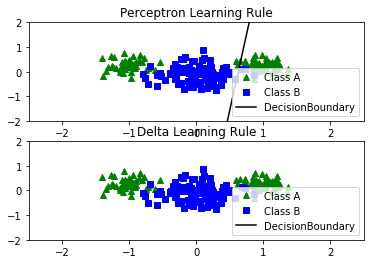

[[0.0404053  0.01154505 0.05614623]]


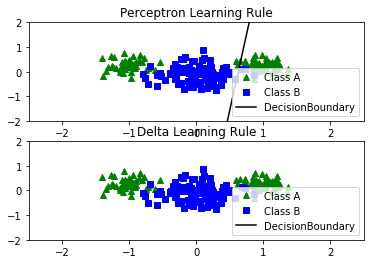

[[0.0404053  0.01154505 0.05614623]]


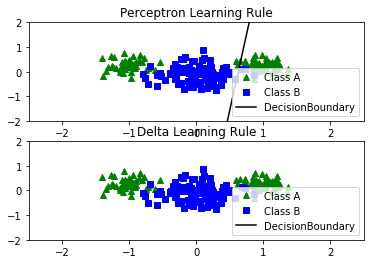

[[0.0404053  0.01154505 0.05614623]]


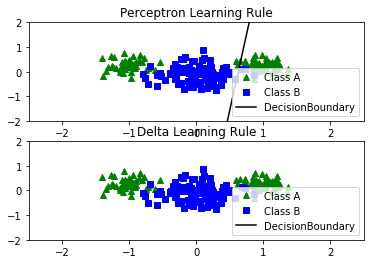

[[0.0404053  0.01154505 0.05614623]]


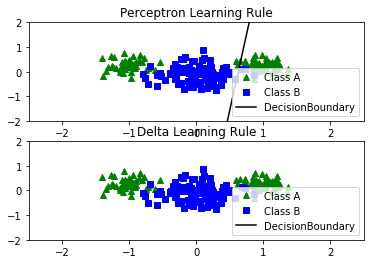

[[0.0404053  0.01154505 0.05614623]]


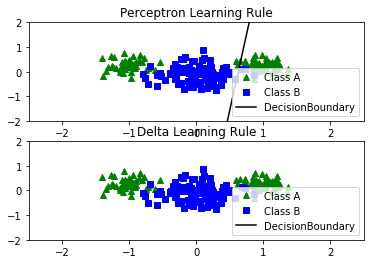

[[0.0404053  0.01154505 0.05614623]]


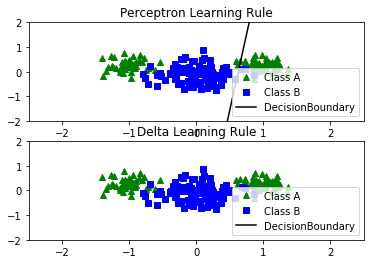

[[0.0404053  0.01154505 0.05614623]]


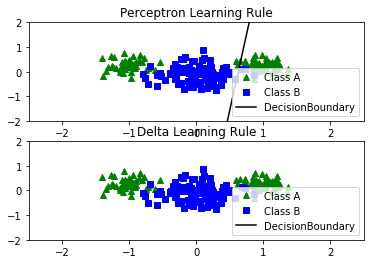

[[0.0404053  0.01154505 0.05614623]]


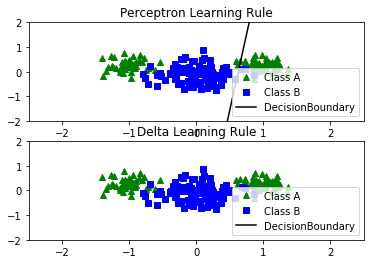

[[0.0404053  0.01154505 0.05614623]]


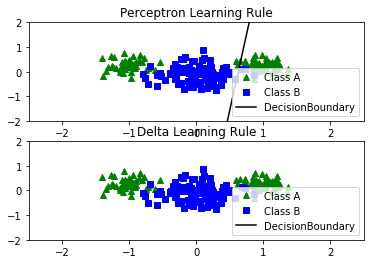

[[0.0404053  0.01154505 0.05614623]]


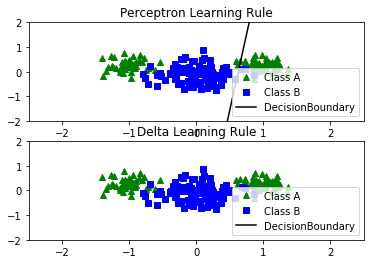

[[0.0404053  0.01154505 0.05614623]]


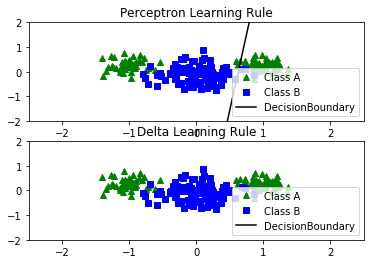

[[0.0404053  0.01154505 0.05614623]]


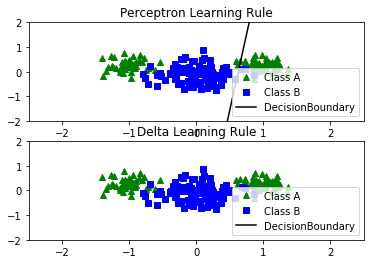

[[0.0404053  0.01154505 0.05614623]]


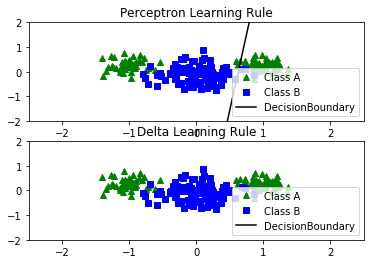

[[0.0404053  0.01154505 0.05614623]]


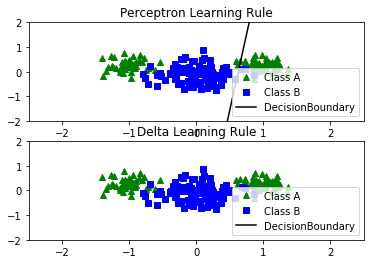

[[0.0404053  0.01154505 0.05614623]]


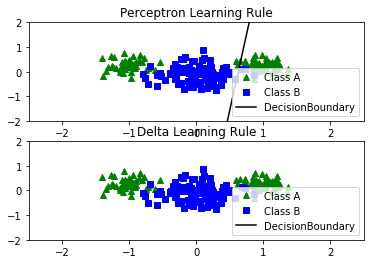

[[0.0404053  0.01154505 0.05614623]]


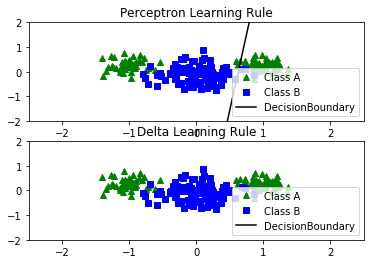

[[0.0404053  0.01154505 0.05614623]]


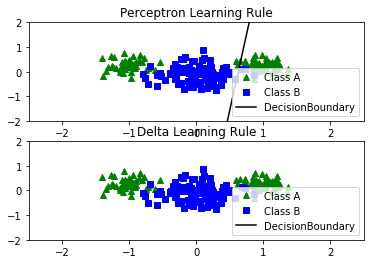

In [26]:
eta = 1e-3
epochs = 20
n_outputs = 1
n_dim = 3
scale = 1e-2
n = 100
X, T = generateSubsets(n,1,pattern=1)
W = weights_init(n_outputs,n_dim,scale)
W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)

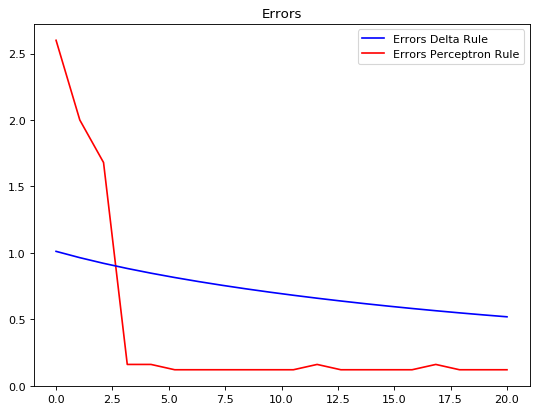

In [164]:
fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
plt_errs_perceptron, = plt.plot(np.linspace(0,epochs,epochs),errors[0][:],'r', label='Errors Perceptron Rule')
plt_errs_delta_rule, = plt.plot(np.linspace(0,epochs,epochs),errors[1][:],'b',label='Errors Delta Rule')
#fig.add_plot(plt_errs_perceptron)
plt.legend(handles=[plt_errs_delta_rule,plt_errs_perceptron])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()

# Use 50% of A but all B:

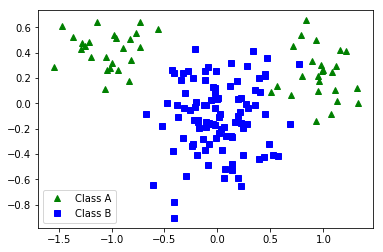

In [27]:
class_A, class_B = generateSubsets(100,2,shuffle=1,pattern=0)

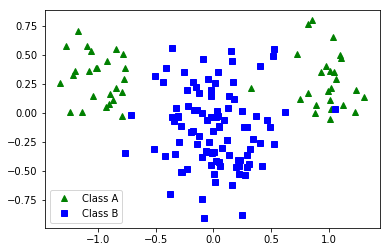

[[-0.05506704  0.01779837  0.02904319]]


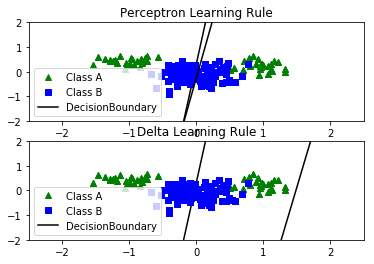

[[-0.00685357  0.03745827 -0.01095681]]


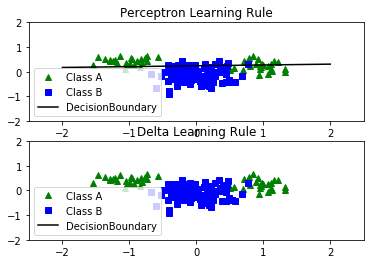

[[0.01741215 0.01715453 0.11304319]]


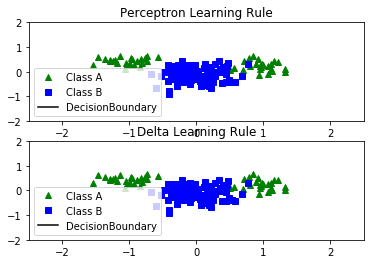

[[0.01093164 0.02685933 0.01304319]]


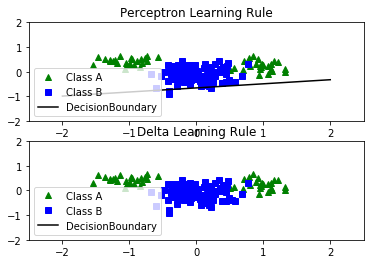

[[-0.00394271  0.02084959 -0.05695681]]


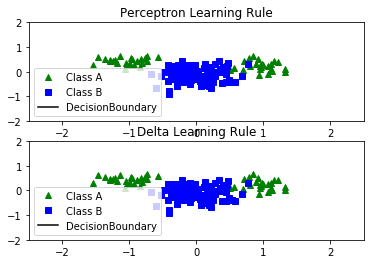

[[-0.0099617   0.0329635   0.14304319]]


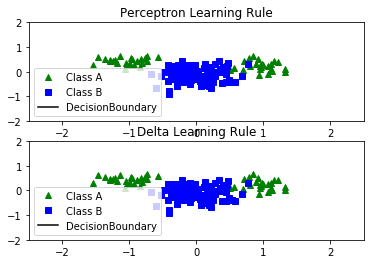

[[-0.01644221  0.0426683   0.04304319]]


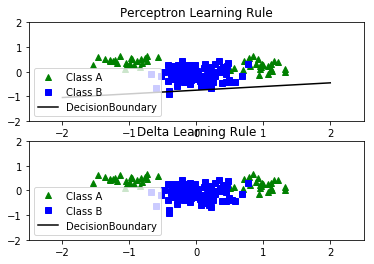

[[-0.02292273  0.0523731  -0.05695681]]


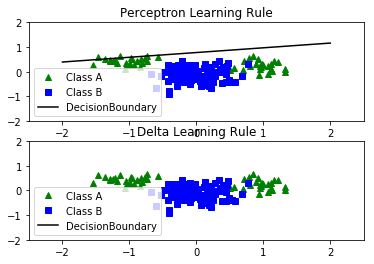

[[-0.02401919  0.06193015  0.13904319]]


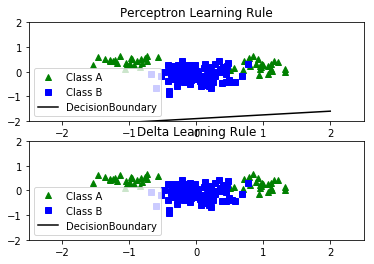

[[-0.0304997   0.07163495  0.03904319]]


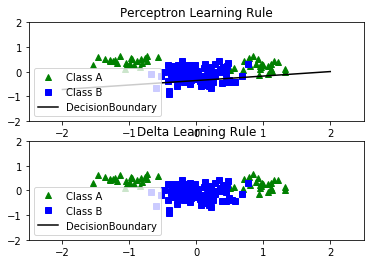

[[-0.03262114  0.0671622  -0.03695681]]


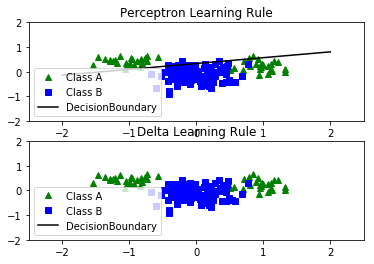

[[0.00707326 0.06206879 0.11504319]]


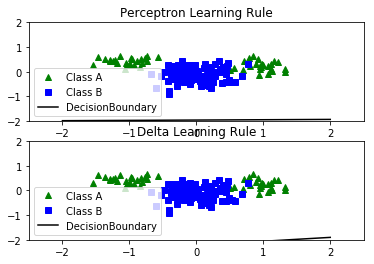

[[0.00059274 0.07177359 0.01504319]]


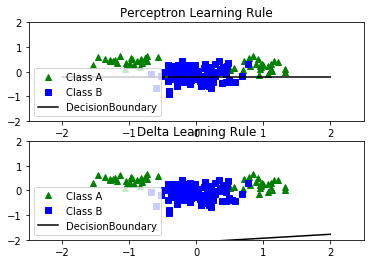

[[-0.00356082  0.04377843  0.00304319]]


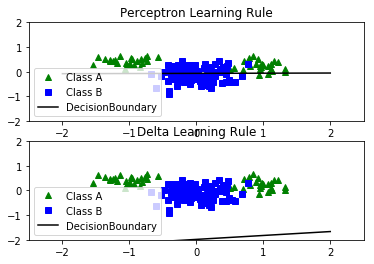

[[0.0002624  0.01249973 0.02104319]]


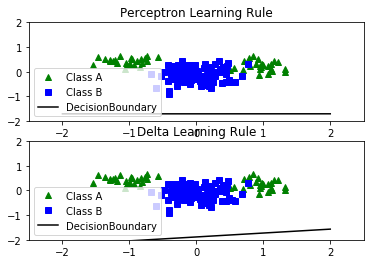

[[-0.00621811  0.02220454 -0.07895681]]


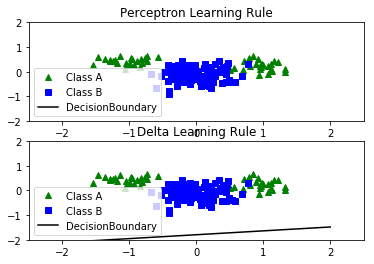

[[-0.0122371   0.03431844  0.12104319]]


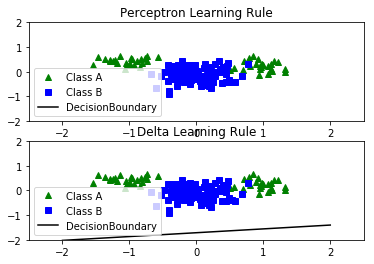

[[-0.01871762  0.04402324  0.02104319]]


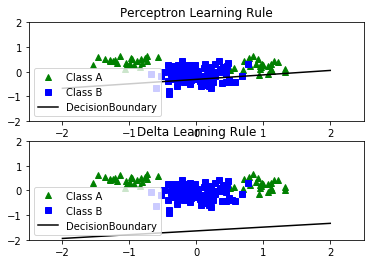

[[-0.01447178  0.03317991 -0.03695681]]


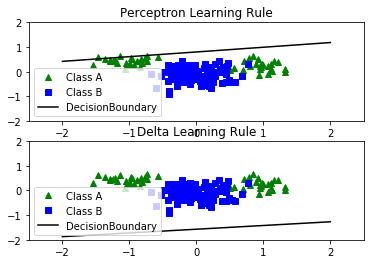

[[-0.01556824  0.04273695  0.15904319]]


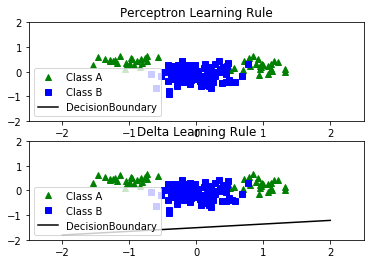

In [29]:
eta = 1e-3
epochs = 20
n_outputs = 1
n_dim = 3
scale = 1e-2
n = 100
X, T = generateSubsets(n,2,pattern=1)
W = weights_init(n_outputs,n_dim,scale)
W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)

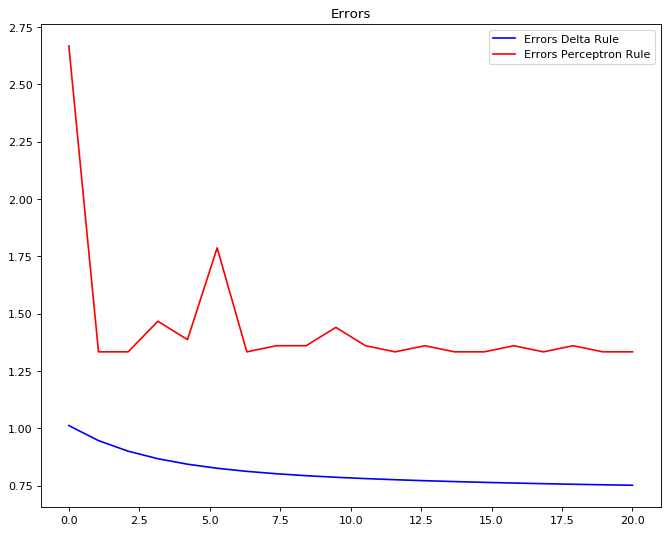

In [185]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt_errs_perceptron, = plt.plot(np.linspace(0,epochs,epochs),errors[0][:],'r', label='Errors Perceptron Rule')
plt_errs_delta_rule, = plt.plot(np.linspace(0,epochs,epochs),errors[1][:],'b',label='Errors Delta Rule')
#fig.add_plot(plt_errs_perceptron)
plt.legend(handles=[plt_errs_delta_rule,plt_errs_perceptron])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()

# 50% of B but 100% of A

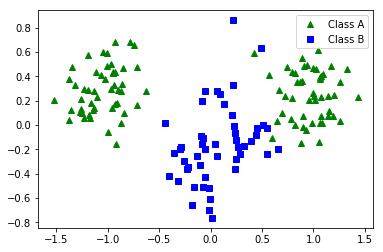

[[0.00304759 0.03774795 0.16729035]]


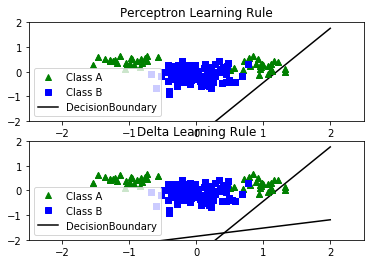

[[-0.00324712  0.05478793  0.06729035]]


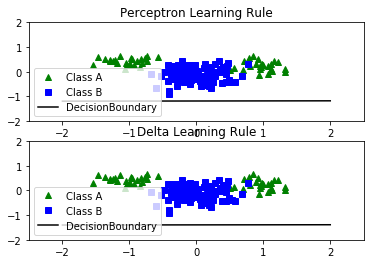

[[-0.00954182  0.0718279  -0.03270965]]


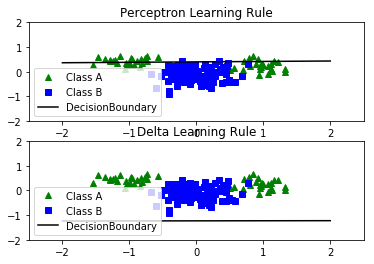

[[0.01774388 0.10023592 0.11929035]]


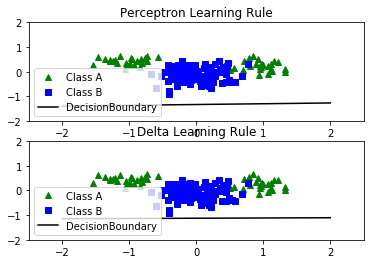

[[0.01144918 0.1172759  0.01929035]]


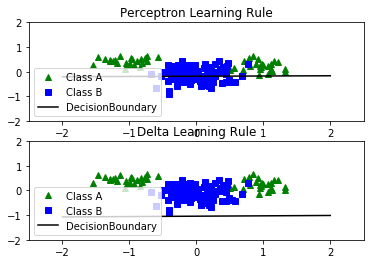

[[-0.00043091  0.11355698 -0.02670965]]


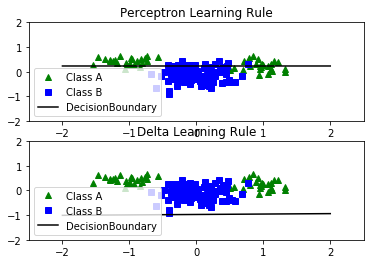

[[-0.00459519  0.11608994  0.05329035]]


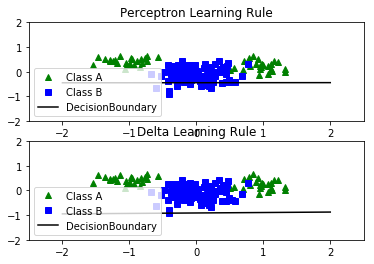

[[-0.01181147  0.12320256 -0.03070965]]


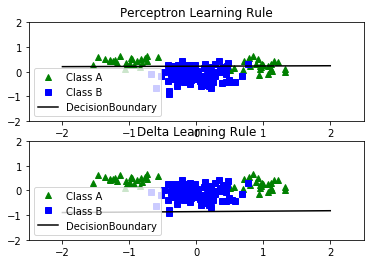

[[0.01723793 0.12633296 0.04529035]]


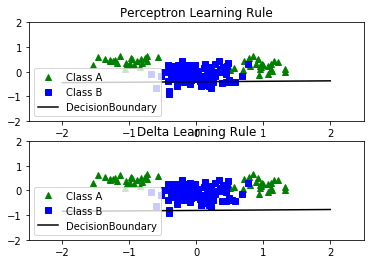

[[ 0.00758081  0.12939261 -0.02870965]]


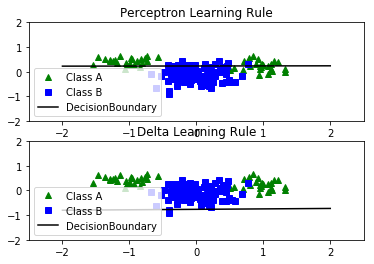

[[-0.01405792  0.1303812   0.04329035]]


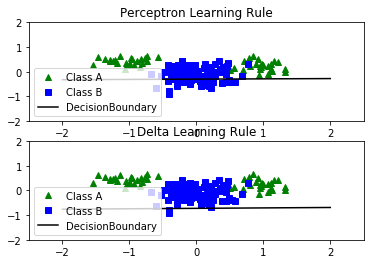

[[-0.02280433  0.13341057 -0.03070965]]


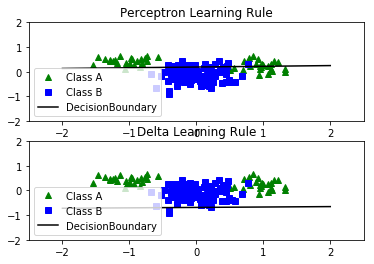

[[0.03997353 0.13860459 0.03529035]]


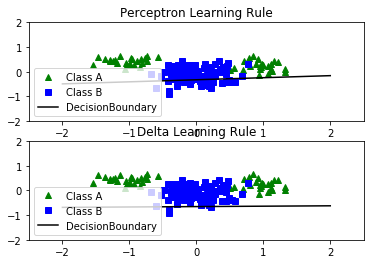

[[ 0.00639392  0.13862359 -0.00670965]]


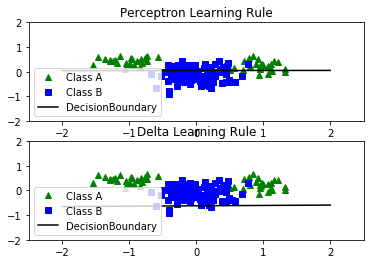

[[-0.00635299  0.13201221  0.00529035]]


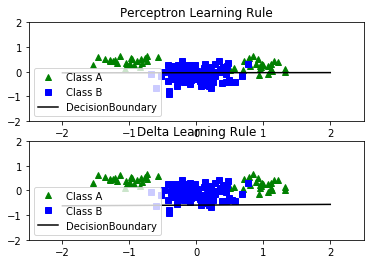

[[-0.00262696  0.12462721 -0.00670965]]


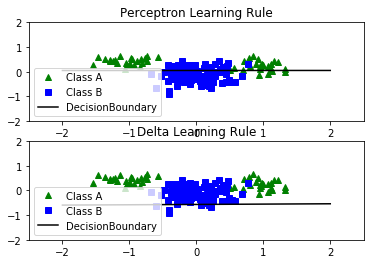

[[0.01983633 0.11807025 0.01329035]]


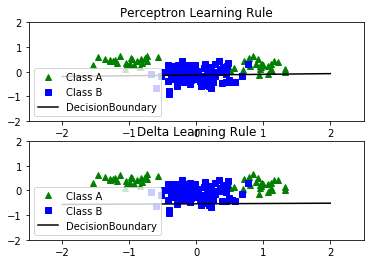

[[-0.00710445  0.11367374 -0.01070965]]


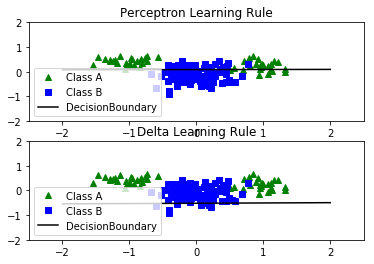

[[0.01946412 0.1077179  0.01529035]]


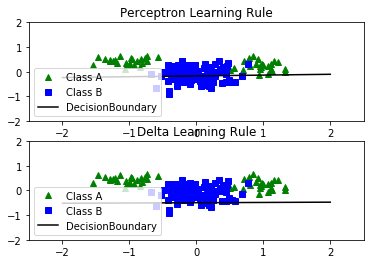

[[-0.00189671  0.10387102 -0.02070965]]


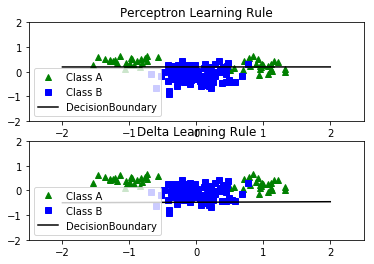

In [30]:
eta = 1e-3
epochs = 20
n_outputs = 1
n_dim = 3
scale = 1e-2
n = 100
X, T = generateSubsets(n,3,pattern=1)
W = weights_init(n_outputs,n_dim,scale)
W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)

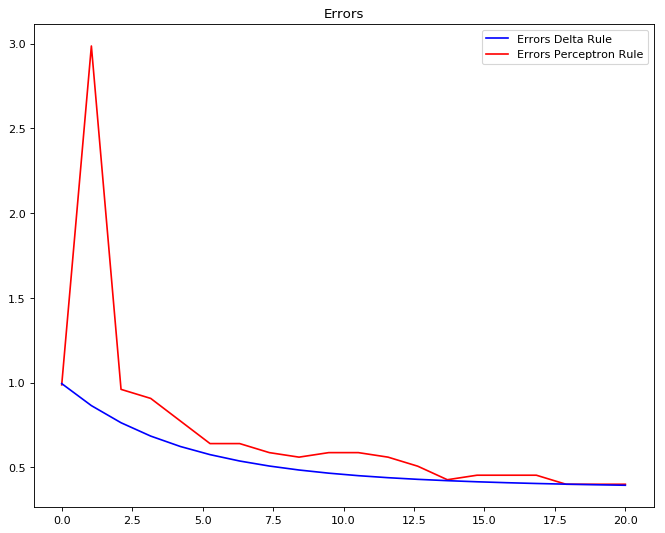

In [40]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt_errs_perceptron, = plt.plot(np.linspace(0,epochs,epochs),errors[0][:],'r', label='Errors Perceptron Rule')
plt_errs_delta_rule, = plt.plot(np.linspace(0,epochs,epochs),errors[1][:],'b',label='Errors Delta Rule')
#fig.add_plot(plt_errs_perceptron)
plt.legend(handles=[plt_errs_delta_rule,plt_errs_perceptron])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()

# 20% from A where class_A(1,:) < 0 and 80% from class_A(1,:)>0

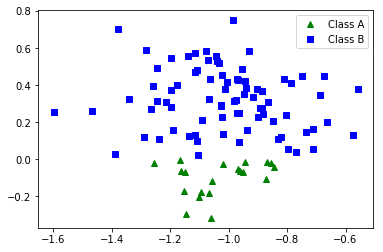

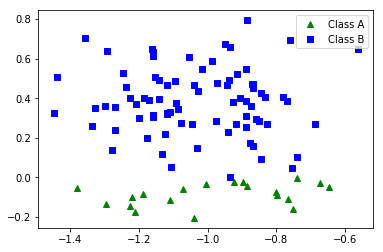

[[-0.19861651  0.04798634  0.18093742]]


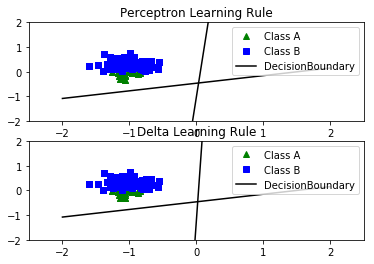

[[-0.19861651  0.04798634  0.18093742]]


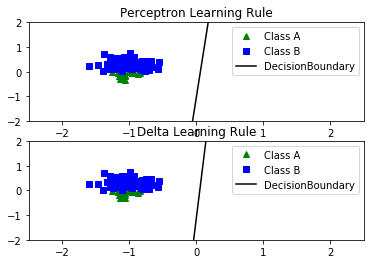

[[-0.19861651  0.04798634  0.18093742]]


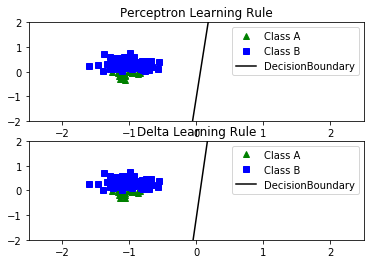

[[-0.19861651  0.04798634  0.18093742]]


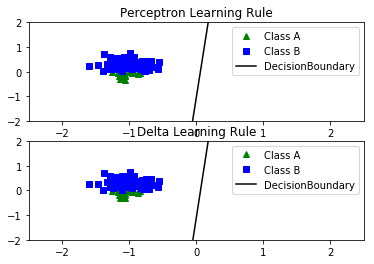

[[-0.19861651  0.04798634  0.18093742]]


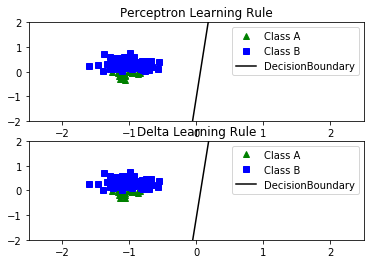

[[-0.19861651  0.04798634  0.18093742]]


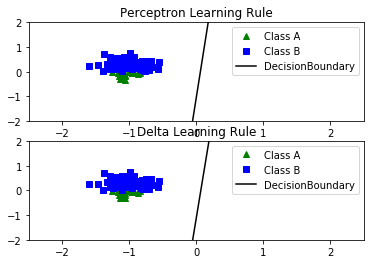

[[-0.19861651  0.04798634  0.18093742]]


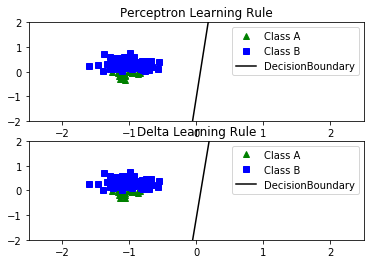

[[-0.19861651  0.04798634  0.18093742]]


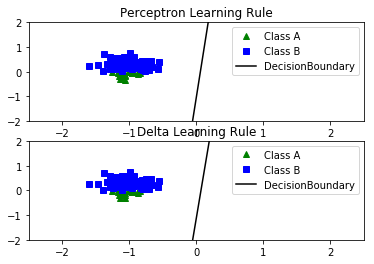

[[-0.19861651  0.04798634  0.18093742]]


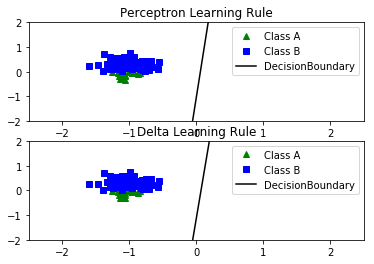

[[-0.19861651  0.04798634  0.18093742]]


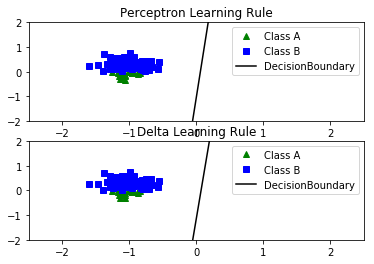

[[-0.19861651  0.04798634  0.18093742]]


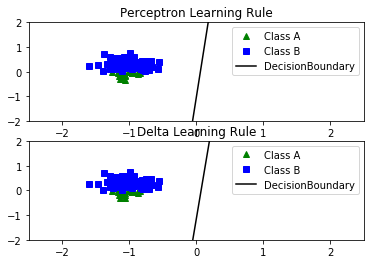

[[-0.19861651  0.04798634  0.18093742]]


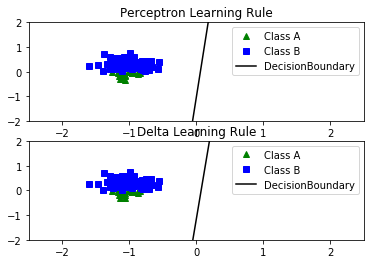

[[-0.19861651  0.04798634  0.18093742]]


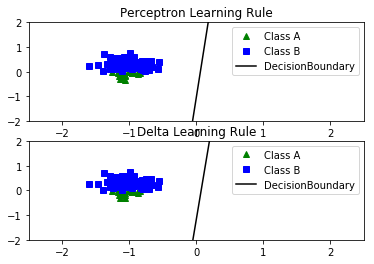

[[-0.19861651  0.04798634  0.18093742]]


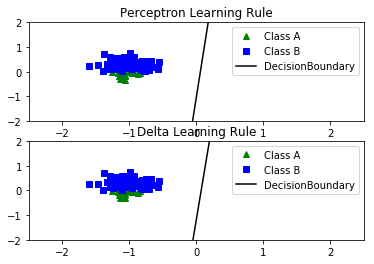

[[-0.19861651  0.04798634  0.18093742]]


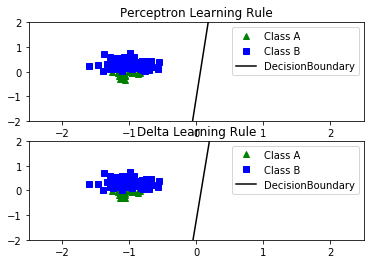

[[-0.19861651  0.04798634  0.18093742]]


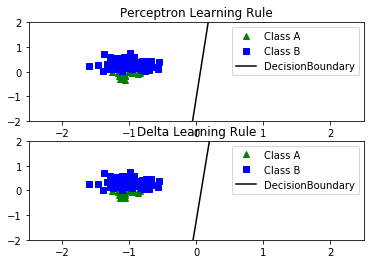

[[-0.19861651  0.04798634  0.18093742]]


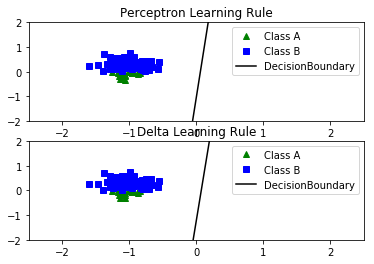

[[-0.19861651  0.04798634  0.18093742]]


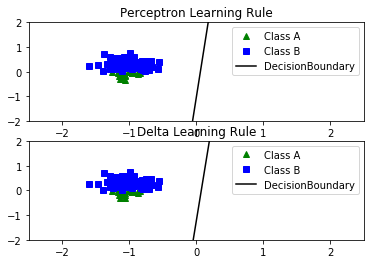

[[-0.19861651  0.04798634  0.18093742]]


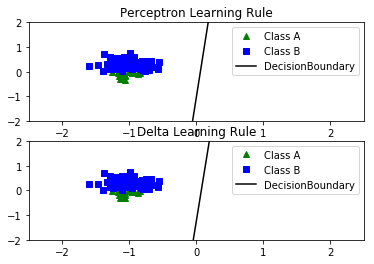

[[-0.19861651  0.04798634  0.18093742]]


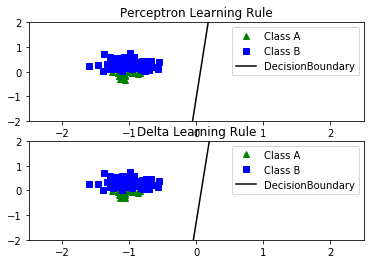

[[3.8        0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [1.01170959 0.62715183 0.39023655 0.24427365 0.15434027 0.09892289
  0.06476849 0.04371282 0.03072645 0.02271108 0.01775809 0.01469169
  0.01278755 0.01159949 0.01085262 0.01037762 0.01007016 0.00986599
  0.00972552 0.00962436]]


In [34]:
eta = 1e-3
epochs = 20
n_outputs = 1
n_dim = 3
scale = 1e-2
n = 1000
class_A, class_B = generateSubsets(n,4,shuffle=1,pattern=0)
X, T = generateSubsets(n,4,pattern=1)
#print(X)
W = weights_init(n_outputs,n_dim,scale)
W_perceptron, W_delta_rule, errors = train_network(eta,X,W,T,epochs)
print(errors)

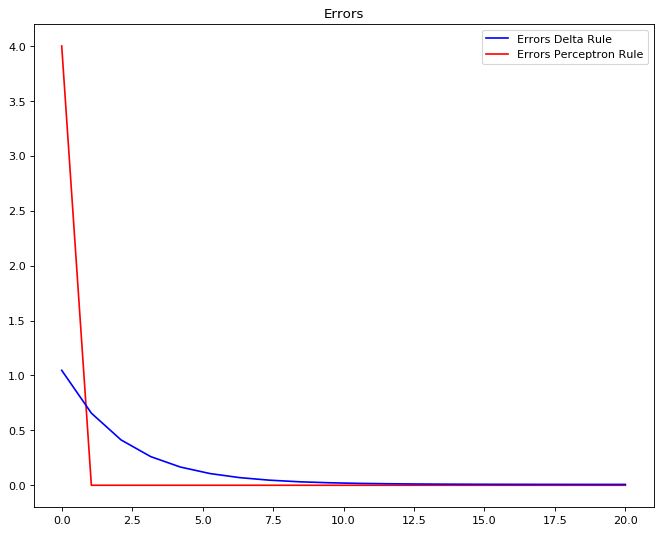

In [33]:
fig=plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
plt_errs_perceptron, = plt.plot(np.linspace(0,epochs,epochs),errors[0][:],'r', label='Errors Perceptron Rule')
plt_errs_delta_rule, = plt.plot(np.linspace(0,epochs,epochs),errors[1][:],'b',label='Errors Delta Rule')
#fig.add_plot(plt_errs_perceptron)
plt.legend(handles=[plt_errs_delta_rule,plt_errs_perceptron])
#plt.axis([0,20,0,100])
plt.title('Errors')
plt.show()